In [9]:
# import here
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(6789)

In [79]:
# create layers 
l1 = np.random.randn(100,64)
l2 = np.random.randn(64, 32)
l3 = np.random.randn(32, 16)
l4 = np.random.randn(16, 1)

# https://stackoverflow.com/questions/46411180/implement-relu-derivative-in-python-numpy
def relu(x): return x * (x>0)
def drelu(x):
    x[x<0] = 0
    x[x=>0 ] = 1
    return x

def sigmoid(x): return 1/(1+np.exp(-x))
def dsigmoid(x):return sigmoid(x) * (1-sigmoid(x))

SyntaxError: invalid syntax (<ipython-input-79-ed7923ce7bd2>, line 11)

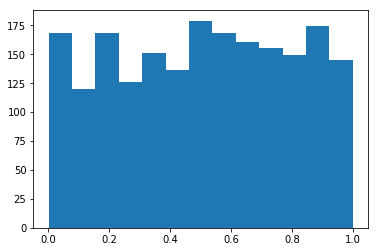

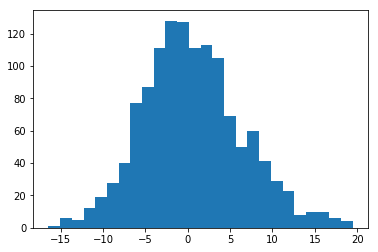

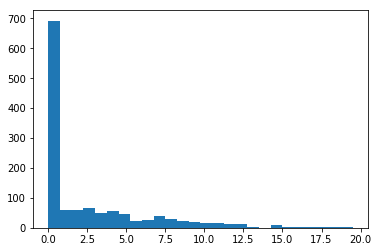

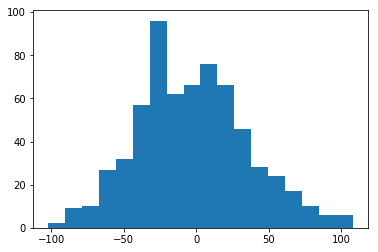

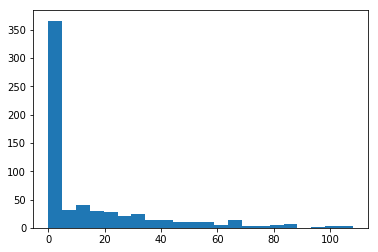

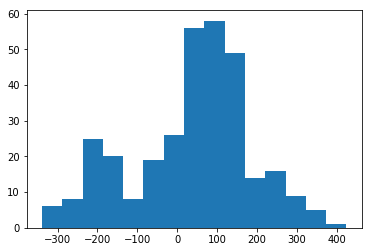

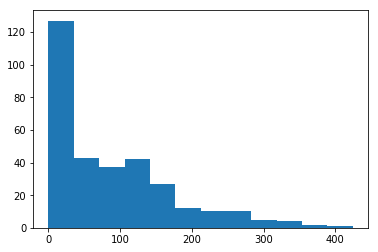

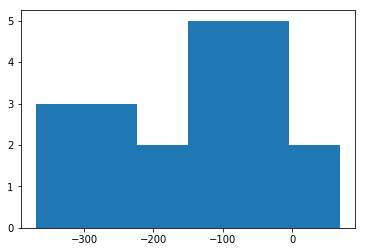

ValueError: Maximum allowed size exceeded

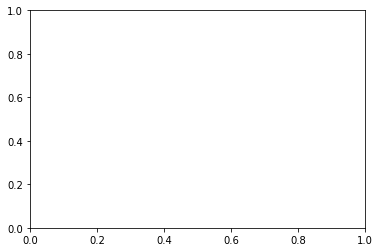

In [76]:
# perform feed forward (relu activation)
x_data = np.random.uniform(0,1,size=(20,100))
random_labels = np.random.binomial(size=(20,1), n=1, p= 0.5)

layer1 = x_data   @ l1; layer1a= relu(layer1)
layer2 = layer1a  @ l2; layer2a= relu(layer2)
layer3 = layer2a  @ l3; layer3a= relu(layer3)
layer4 = layer3a  @ l4; layer4a= sigmoid(layer4)

plt.hist(x_data.flatten(),'auto'); plt.show()
plt.hist(layer1.flatten(),'auto'); plt.show()
plt.hist(layer1a.flatten(),'auto'); plt.show()
plt.hist(layer2.flatten(),'auto'); plt.show()
plt.hist(layer2a.flatten(),'auto'); plt.show()
plt.hist(layer3.flatten(),'auto'); plt.show()
plt.hist(layer3a.flatten(),'auto'); plt.show()
plt.hist(layer4.flatten(),'auto'); plt.show()
plt.hist(layer4a.flatten(),'auto'); plt.show()

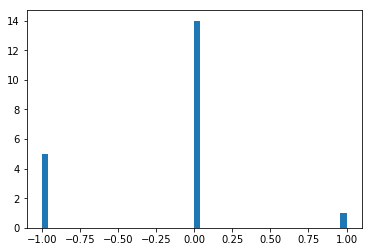

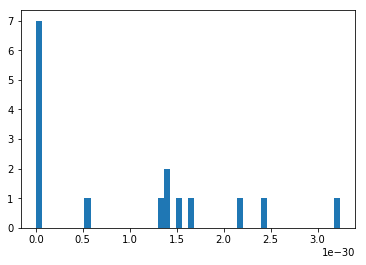

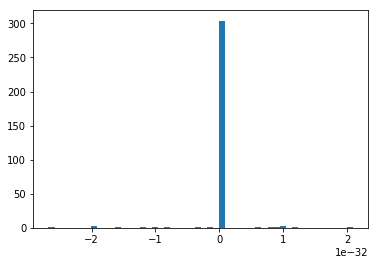

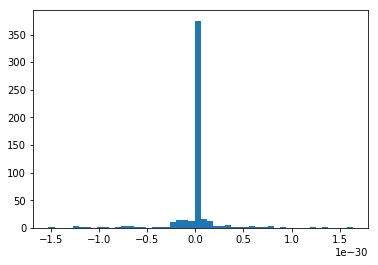

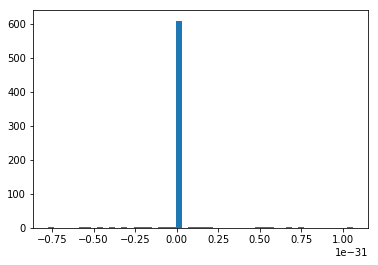

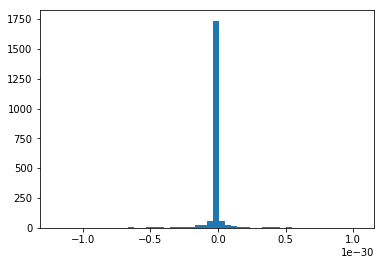

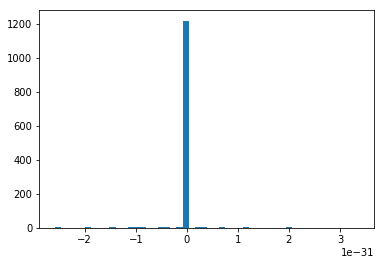

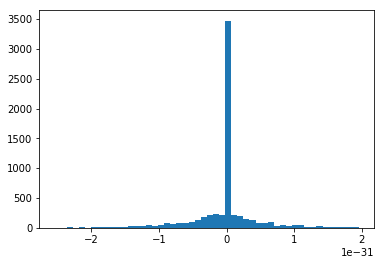

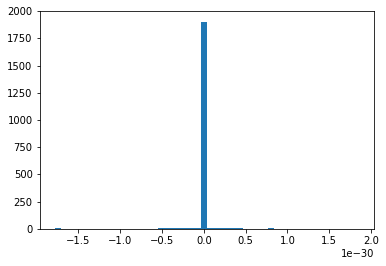

In [78]:
# perform back propagation
cost          = 0.5 * (layer4a-random_labels) ** 2
dcost         = (layer4a-random_labels)
dgrad4     = layer3a.T @ (dsigmoid(layer4) * dcost)
dgrad4pass = (dsigmoid(layer4) * dcost)   @ l4.T
dgrad3     = layer2a.T @ (drelu(layer3) * dgrad4pass) 
dgrad3pass = (drelu(layer3) * dgrad4pass) @ l3.T
dgrad2     = layer1a.T @ (drelu(layer2) * dgrad3pass) 
dgrad2pass = (drelu(layer2) * dgrad3pass) @ l2.T
dgrad1     = x_data.T  @ (drelu(layer1) * dgrad2pass) 
dgrad1pass = (drelu(layer1) * dgrad2pass) @ l1.T

plt.hist(dcost.ravel(),50); plt.show()
plt.hist(dgrad4.ravel(),50); plt.show()
plt.hist(dgrad4pass.ravel(),50); plt.show()
plt.hist(dgrad3.ravel(),50); plt.show()
plt.hist(dgrad3pass.ravel(),50); plt.show()
plt.hist(dgrad2.ravel(),50); plt.show()
plt.hist(dgrad2pass.ravel(),50); plt.show()
plt.hist(dgrad1.ravel(),50); plt.show()
plt.hist(dgrad1pass.ravel(),50); plt.show()

In [56]:
# push to git
! git add .
! git commit -m " from mac "
! git push

[master 58f92ae1]  from mac
 2 files changed, 706 insertions(+), 737 deletions(-)
 rewrite Class Stuff/principal_component_analysis_regularization/random_notes/.ipynb_checkpoints/1. np implementation -checkpoint.ipynb (65%)
 rewrite Class Stuff/principal_component_analysis_regularization/random_notes/1. np implementation .ipynb (82%)
Counting objects: 7, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 34.16 KiB | 8.54 MiB/s, done.
Total 7 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   b0c4c6de..58f92ae1  master -> master


# Reference
1. numpy, I. (2018). Implement Relu derivative in python numpy. Stack Overflow. Retrieved 13 December 2018, from https://stackoverflow.com/questions/46411180/implement-relu-derivative-in-python-numpy
2. 